## Assignment 2 NUMPY

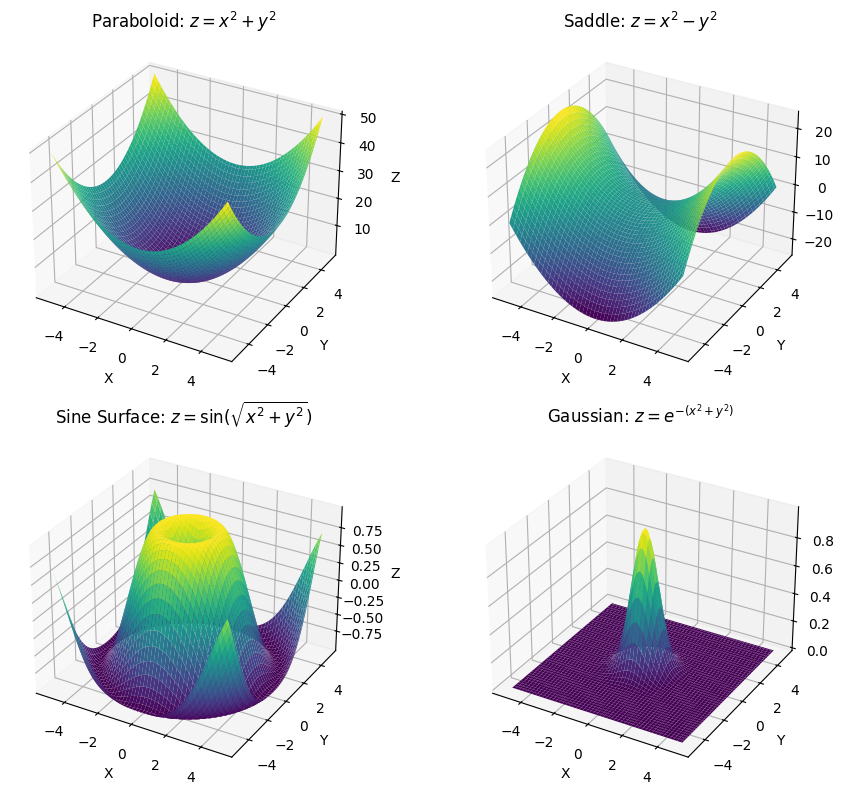

FloatSlider(value=5.0, description='X Range', max=10.0, min=1.0)

FloatSlider(value=5.0, description='Y Range', max=10.0, min=1.0)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.widgets import Slider

# Step 1: Choose Mathematical Functions
# Define functions that exhibit interesting geometric properties
def paraboloid(X, Y):
    return X**2 + Y**2

def saddle(X, Y):
    return X**2 - Y**2

def sine_surface(X, Y):
    return np.sin(np.sqrt(X**2 + Y**2))

def gaussian(X, Y):
    return np.exp(-(X**2 + Y**2))

# Step 2: Generate Data Points
# Define ranges for the parameters
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Evaluate the functions at each point
Z_paraboloid = paraboloid(X, Y)
Z_saddle = saddle(X, Y)
Z_sine_surface = sine_surface(X, Y)
Z_gaussian = gaussian(X, Y)

# Step 3: Create 3D Visualization
# Function to plot the surface
def plot_surface(ax, X, Y, Z, title):
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

# Create a figure
fig = plt.figure(figsize=(10, 8))

# Paraboloid plot
ax1 = fig.add_subplot(221, projection='3d')
plot_surface(ax1, X, Y, Z_paraboloid, 'Paraboloid: $z = x^2 + y^2$')

# Saddle plot
ax2 = fig.add_subplot(222, projection='3d')
plot_surface(ax2, X, Y, Z_saddle, 'Saddle: $z = x^2 - y^2$')

# Sine Surface plot
ax3 = fig.add_subplot(223, projection='3d')
plot_surface(ax3, X, Y, Z_sine_surface, 'Sine Surface: $z = \sin(\sqrt{x^2 + y^2})$')

# Gaussian plot
ax4 = fig.add_subplot(224, projection='3d')
plot_surface(ax4, X, Y, Z_gaussian, 'Gaussian: $z = e^{-(x^2 + y^2)}$')

# Adjust layout
plt.tight_layout()
plt.show()

# Step 4: Interactive Exploration (Optional)
try:
    import ipywidgets as widgets
    from IPython.display import display
    
    # Function to update the plot based on slider values
    def update_plot(z_func):
        Z = z_func(X, Y)
        for ax in [ax1, ax2, ax3, ax4]:
            ax.clear()
        plot_surface(ax1, X, Y, Z_paraboloid, 'Paraboloid: $z = x^2 + y^2$')
        plot_surface(ax2, X, Y, Z_saddle, 'Saddle: $z = x^2 - y^2$')
        plot_surface(ax3, X, Y, Z_sine_surface, 'Sine Surface: $z = \sin(\sqrt{x^2 + y^2})$')
        plot_surface(ax4, X, Y, Z_gaussian, 'Gaussian: $z = e^{-(x^2 + y^2)}$')
        fig.canvas.draw_idle()
    
    # Create sliders for X and Y range
    slider_x_range = widgets.FloatSlider(min=1, max=10, step=0.1, value=5, description='X Range')
    slider_y_range = widgets.FloatSlider(min=1, max=10, step=0.1, value=5, description='Y Range')
    
    # Update function when slider changes
    def on_slider_change(change):
        global X, Y
        x = np.linspace(-change['new'], change['new'], 100)
        y = np.linspace(-slider_y_range.value, slider_y_range.value, 100)
        X, Y = np.meshgrid(x, y)
        update_plot(paraboloid)
    
    slider_x_range.observe(on_slider_change, names='value')
    slider_y_range.observe(on_slider_change, names='value')
    
    # Display sliders
    display(slider_x_range, slider_y_range)
    update_plot(paraboloid)
except ImportError:
    print("ipywidgets is not installed. Interactive features are disabled.")


# Explanation of the Code

   #### Import Libraries:
        numpy: For numerical operations and creating a grid of points.
        matplotlib.pyplot: For creating plots.
        mpl_toolkits.mplot3d: For 3D plotting capabilities in Matplotlib.
        matplotlib.widgets.Slider: For creating interactive sliders (optional).

   #### Define Mathematical Functions:
        Four functions are defined: paraboloid, saddle, sine_surface, and gaussian, each taking X and Y as inputs and returning the corresponding Z values.

   #### Generate Data Points:
        Use np.linspace to create a range of values for x and y.
        Use np.meshgrid to create a grid of points.
        Evaluate each function on the grid points to get the Z values.

   #### Create 3D Visualization:
        Define a plot_surface function to plot a 3D surface with a given title.
        Create a figure and add four subplots for each mathematical surface.
        Plot each surface and adjust the layout.

   #### Optional Interactive Exploration:
        Try to import ipywidgets for interactive sliders.
        Define a function update_plot to update the plots based on slider values.
        Create sliders for adjusting the range of X and Y.
        Attach observers to the sliders to update the plot when the values change.
        Display the sliders.

### Documentation
### How to Use the Tool

   #### Run the Script:
        Ensure you have the required libraries installed (numpy, matplotlib, ipywidgets for interactive features).
        Run the script to see the 3D visualizations of the four mathematical surfaces.

   #### Interactive Features (Optional):
        If running in a Jupyter environment and ipywidgets is installed, you can adjust the X and Y range using the sliders.
        Observe how the surfaces change dynamically as you adjust the sliders.

### Mathematical Functions Chosen

   #### Paraboloid: z=x2+y2z=x2+y2
        Smooth, bowl-shaped surface.
        Symmetric and opens upwards.

   #### Saddle (Hyperbolic Paraboloid): z=x2−y2z=x2−y2
        Saddle-like surface.
        Curves upwards in one direction and downwards in the perpendicular direction.

   #### Sine Surface: z=sin⁡(x2+y2)z=sin(x2+y2)
        Wavy surface with oscillations.
        Peaks and troughs radiating from the center.

   ### Gaussian Surface: z=e−(x2+y2)z=e−(x2+y2)
        Bell-shaped surface.
        Peaks at the center and tapers off smoothly.

### Conclusion

This script provides a comprehensive tool for visualizing and interacting with various mathematical surfaces using NumPy and Matplotlib. The interactive features enhance the user experience by allowing real-time exploration of these surfaces.
